In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#import pymc3 as pm
#import arviz as az
#from theano import function, tensor as tt


In [4]:
df = pd.read_csv('C:\\Users\KELLY\\PycharmProjects\\DISEASE_PREDICTION\\disease_prediction\\Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
df.shape
#132 symptoms against 49 diseases

(4920, 133)

In [6]:
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [7]:
long = pd.melt(df, id_vars = 'prognosis', var_name='symptom', value_name='yes/no')

In [8]:
long.head()

,prognosis,symptom,yes/no
0,Fungal infection,itching,1
1,Fungal infection,itching,0
2,Fungal infection,itching,1
3,Fungal infection,itching,1
4,Fungal infection,itching,1


In [9]:
#df.sort_values('prognosis', ascending='true')

#Filtering

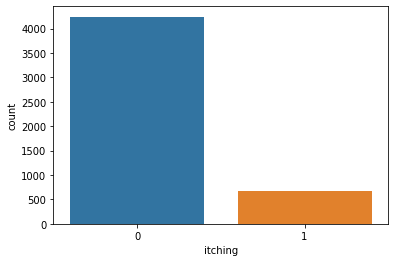

In [10]:
sns.countplot(x='itching', data=df)

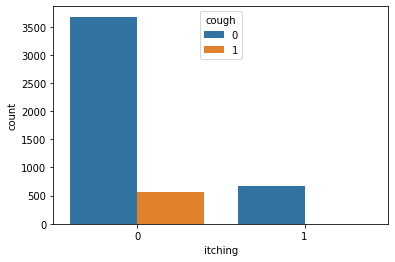

In [11]:
sns.countplot(x='itching',hue='cough', data=df)


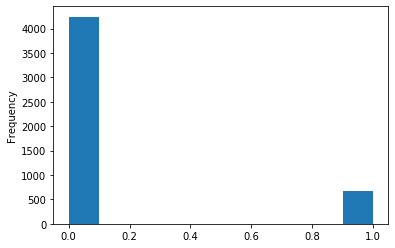

In [12]:
df['itching'].plot.hist()

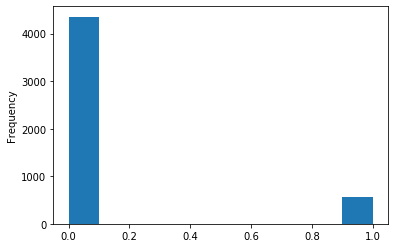

In [13]:
df['cough'].plot.hist()

# wrangling

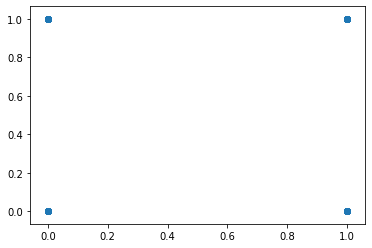

In [14]:
#show relationship between variables(symptoms)
plt.scatter(df['itching'],df['skin_rash'])


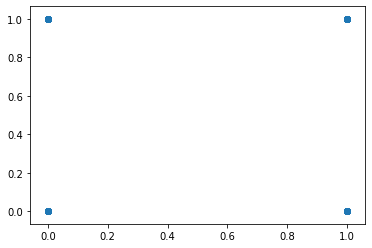

In [15]:
#show relationship between variables(symptoms)
plt.scatter(df['cough'],df['chills'])

In [16]:
#df.isnull()

In [17]:
#sns.heatmap(df.is_null(),yticklabels==False)

In [17]:
label_names = df['prognosis']
labels = df['prognosis']
#print(labels)

# training

In [25]:
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1)
#X_train
#y_train

In [28]:
#BUILDING MODEL
from sklearn.naive_bayes import GaussianNB

In [29]:
#INITIALIZES MODEL
gnb = GaussianNB()

In [34]:
#trains model
model = gnb.fit(X_train, y_train)

# evaluating model

In [43]:
#prediction
predictions = gnb.predict(X_test)
print(predictions)

['Urinary tract infection' 'Gastroenteritis' 'Hypothyroidism' ...
 '(vertigo) Paroymsal  Positional Vertigo' 'Bronchial Asthma' 'Pneumonia']


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, predictions)

array([[43,  0,  0, ...,  0,  0,  0],
       [ 0, 31,  0, ...,  0,  0,  0],
       [ 0,  0, 39, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 30,  0,  0],
       [ 0,  0,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 41]], dtype=int64)

In [31]:
#az.plot_kde(data['itching'].values, rug=True)
#plt.yticks([0], alpha=0);

Text(0, 0.5, 'Predictions')

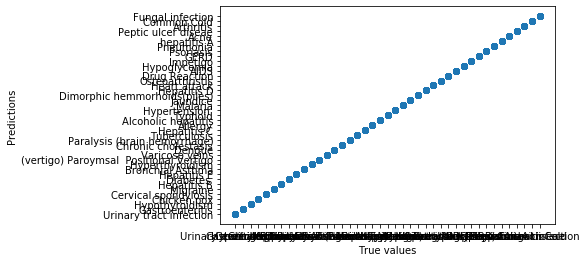

In [47]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.ylabel("Predictions")